# EE8603 Selected Topics in Machine Learning Term Project:

# *Evaluation of Quality in Red Wine using Linear Regression Models*

# Abstract
### Wine quality has become a key metric for performance and competition for wineries in the industry. Sommeliers are trained for years to critique and preserve the art of winemaking and new techniques for evaluating quality are being implemented. Using the Red Wine dataset from UC Irvine Wine Quality repository, we use a Linear Regression Model to evaluate the alcohol content in correlation with other wine features to see how the quality is impacted. After comparing several models, the CatBoost Regressor, Light gradient boosting and Extreme gradient boosting performed the most optimally when using the MSE and R2 performance metrics. It's found that the CatBoost Regressor is the optimal model for this dataset with an MSE score of 0.2421 and R2 of 0.7792. In terms of key features of Red Wine Residual Sugar and density are the two most prominent features for predicting the quality of alcohol in red wine.

## Install Pycaret and Associative Libraries

In [ ]:
!pip install pycaret[full]
!pip install scipy
import pycaret
pycaret.__version__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
model_dir = 'https://drive.google.com/drive/folders/1BfZHtaXJLYo2zswDtSrTrf52J44fOmTx?usp=drive_link'
os.makedirs(model_dir, exist_ok=True)

Mounted at /content/drive


In [ ]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
import matplotlib.pyplot as plt

# fetch dataset
#!wget -q https://archive.ics.uci.edu/dataset/186/wine+quality.zip
#!unzip -q wine+quality.zip

## Import Dataset + Set Targets

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dalmuina1701/EE8603_Term_Project_DEAP/main/winequality-red.csv'
df = pd.read_csv(url)
display(df.head())
X = df.drop(columns=['alcohol'], axis=1)
y = df['alcohol']

id = 123
s = setup(df, target='alcohol', session_id=id)
print (s)

## Create Experiment

In [ ]:
exp = RegressionExperiment()
type(exp)

exp.setup(df, target = 'alcohol', session_id = id)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


# Compare Models
Compare the models to see which ones give us the most accurate correlations based on the mean square error and root mean square

In [ ]:
# compare baseline models
best = compare_models()
print('')
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3338,0.2421,0.4902,0.7792,0.0417,0.0317,2.7710
lightgbm,Light Gradient Boosting Machine,0.3501,0.2699,0.5173,0.7524,0.0441,0.0333,0.3580
xgboost,Extreme Gradient Boosting,0.3436,0.2725,0.5198,0.7507,0.0443,0.0326,0.1630
et,Extra Trees Regressor,0.3448,0.2807,0.5282,0.7435,0.0450,0.0328,0.6770
gbr,Gradient Boosting Regressor,0.3987,0.2935,0.5405,0.7318,0.0462,0.0380,0.2050
rf,Random Forest Regressor,0.3759,0.2956,0.5418,0.7289,0.0463,0.0358,0.6350
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,1.2170
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0600
ada,AdaBoost Regressor,0.5604,0.4707,0.6851,0.5691,0.0593,0.0543,0.1480
dt,Decision Tree Regressor,0.4757,0.5554,0.7429,0.4877,0.0635,0.0450,0.0340


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

# Tune Model
CatBoost is the most best model for plotting our dataset. Using the density and residual suagar features as the tuning features, we can re-train our model and tune it for higher accuracy


In [ ]:
from catboost import CatBoostRegressor

CBR = create_model('catboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2889,0.1720,0.4147,0.8008,0.0370,0.0284
1,0.3877,0.3070,0.5541,0.7018,0.0477,0.0368
2,0.3467,0.2293,0.4789,0.8079,0.0418,0.0335
3,0.3624,0.2888,0.5374,0.7803,0.0460,0.0346
4,0.2944,0.2002,0.4474,0.7749,0.0380,0.0279
5,0.3297,0.2507,0.5007,0.7906,0.0410,0.0302
6,0.3062,0.2833,0.5323,0.7437,0.0425,0.0282
7,0.3493,0.2297,0.4793,0.8147,0.0408,0.0331
8,0.3140,0.2068,0.4547,0.7725,0.0392,0.0301


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_CBR = tune_model(CBR,n_iter = 50)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:03:58
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


# Analyze Model


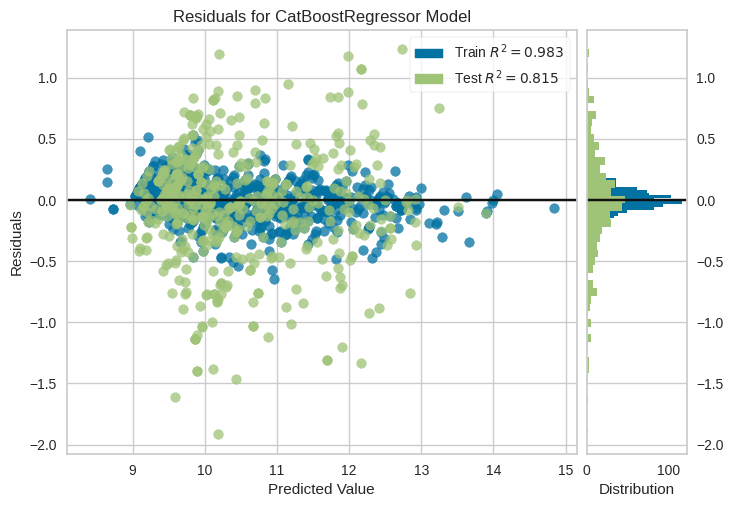

In [ ]:
plot_model(tuned_CBR, plot = 'residuals')

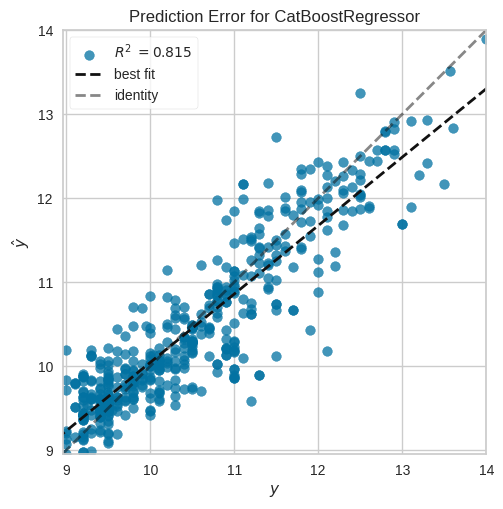

In [ ]:
plot_model(tuned_CBR, plot = 'error')

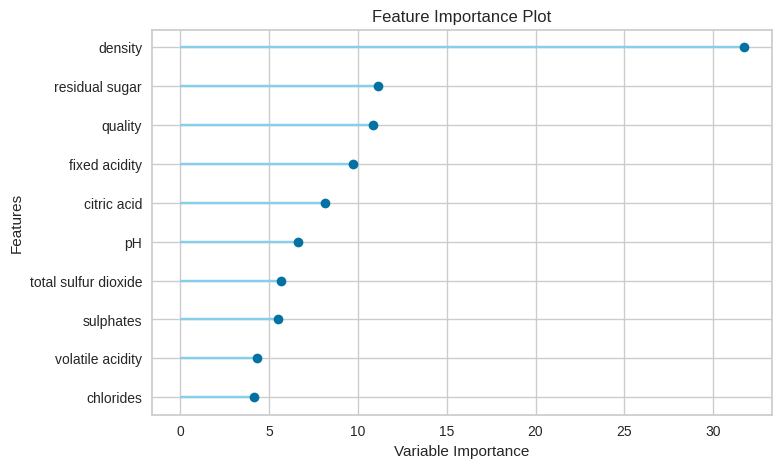

In [ ]:
plot_model(tuned_CBR, plot = 'feature')

In [ ]:
evaluate_model(tuned_CBR)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict Model

In [ ]:
pred = predict_model(tuned_CBR)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3385,0.2185,0.4674,0.8147,0.0400,0.0319


In [ ]:
pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4,8,0.99674,3.33,0.62,6,12.2,11.355346
772,9.5,0.57,0.27,2.3,0.082,23,144,0.99782,3.27,0.55,5,9.4,9.555976
1037,7.3,0.91,0.10,1.8,0.074,20,56,0.99672,3.35,0.56,5,9.2,9.419939
1106,8.2,0.23,0.42,1.9,0.069,9,17,0.99376,3.21,0.54,6,12.3,11.863663
263,7.9,0.37,0.23,1.8,0.077,23,49,0.99630,3.28,0.67,5,9.3,9.827743


In [ ]:
new_data = df.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,5


In [ ]:
predictions = predict_model(tuned_CBR, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,5,9.417804
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,5,9.679707
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,5,9.742302
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,6,9.897593
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,5,9.417804


In [ ]:
finalize_model(tuned_CBR)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x7c61746f9c90>)])

In [ ]:
final_CBR = finalize_model(tuned_CBR) #Store final model as variable

In [122]:
final_CBR = save_model(tuned_CBR,'final_CBR')
print(final_CBR)

Transformation Pipeline and Model Successfully Saved
(Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoo